In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil import parser
from matplotlib import rcParams, style
style.use('ggplot')

In [2]:
#read_data
df_origin = pd.read_csv("seoul_cir.csv")

In [3]:
#check loaded data without first row
df = df_origin.ix[1:]
df.head()

,"﻿""관측일자""",지점명,평균기온(℃),최저기온(℃),최대기온(℃),평균습도(%),최저습도(%),최고습도(%),평균풍속(m/s),최대풍속(m/s),강수량(mm)
1,20160127,남산,-0.10000000149011612,-3.4000000953674316,3.2000000476837158,49.299999237060547,26.399999618530273,71.900001525878906,1,4.5999999046325684,0
2,20160127,강서,0,-3.7999999523162842,3.5999999046325684,62.099998474121094,43.400001525878906,73.900001525878906,1.1000000238418579,4.0999999046325684,0
3,20160127,성북,0.20000000298023224,-3.0999999046325684,3.9000000953674316,56.200000762939453,39.900001525878906,65.800003051757812,1.1000000238418579,5.1999998092651367,0
4,20160127,도봉,-0.40000000596046448,-4.8000001907348633,4.0999999046325684,56.799999237060547,37,75.5,0.89999997615814209,3.7000000476837158,0
5,20160127,마포,-0.30000001192092896,-4,3.7999999523162842,61.099998474121094,41.799999237060547,74.300003051757812,0.89999997615814209,4.6999998092651367,0


In [4]:
#change column name
df.columns = ['date','place', 'avg_temp', 'l_temp','h_temp','avg_hum','l_hum','h_hum','avg_wind','h_wind','rain']
df.head()

,date,place,avg_temp,l_temp,h_temp,avg_hum,l_hum,h_hum,avg_wind,h_wind,rain
1,20160127,남산,-0.10000000149011612,-3.4000000953674316,3.2000000476837158,49.299999237060547,26.399999618530273,71.900001525878906,1,4.5999999046325684,0
2,20160127,강서,0,-3.7999999523162842,3.5999999046325684,62.099998474121094,43.400001525878906,73.900001525878906,1.1000000238418579,4.0999999046325684,0
3,20160127,성북,0.20000000298023224,-3.0999999046325684,3.9000000953674316,56.200000762939453,39.900001525878906,65.800003051757812,1.1000000238418579,5.1999998092651367,0
4,20160127,도봉,-0.40000000596046448,-4.8000001907348633,4.0999999046325684,56.799999237060547,37,75.5,0.89999997615814209,3.7000000476837158,0
5,20160127,마포,-0.30000001192092896,-4,3.7999999523162842,61.099998474121094,41.799999237060547,74.300003051757812,0.89999997615814209,4.6999998092651367,0


In [5]:
#set gu_name list for pop out gu data
seoul_gu_list =['강남구', '강동구', '강북구', '강서구', '관악구', '광진구',
'구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
'서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구',
'종로구', '중구구', '중랑구']


In [6]:
#set list data to dataframe['place'] data  remove'구'
seoul_list = []
for i in seoul_gu_list:
    ii = i[:-1]
    seoul_list.append(ii)
seoul_list

['강남',
 '강동',
 '강북',
 '강서',
 '관악',
 '광진',
 '구로',
 '금천',
 '노원',
 '도봉',
 '동대문',
 '동작',
 '마포',
 '서대문',
 '서초',
 '성동',
 '성북',
 '송파',
 '양천',
 '영등포',
 '용산',
 '은평',
 '종로',
 '중구',
 '중랑']

In [7]:
#make initial each gu df as dictionary 
#initial data is '성북' data
seoul_df_dict = {'강남':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '강동':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '강북':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '강서':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '관악':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '광진':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '구로':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '금천':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '노원':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '도봉':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '동대문':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '동작':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '마포':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '서대문':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '서초':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '성동':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '성북':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '송파':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '양천':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '영등포':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '용산':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '은평':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '종로':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '중구':pd.DataFrame(list(df.ix[3]), index=df.columns),
 '중랑':pd.DataFrame(list(df.ix[3]), index=df.columns)}

In [8]:
#transpose all df in seoul_df_dict
for i in seoul_list:
    seoul_df_dict[i] = seoul_df_dict[i].T
seoul_df_dict['종로']

,date,place,avg_temp,l_temp,h_temp,avg_hum,l_hum,h_hum,avg_wind,h_wind,rain
0,20160127,성북,0.20000000298023224,-3.0999999046325684,3.9000000953674316,56.200000762939453,39.900001525878906,65.800003051757812,1.1000000238418579,5.1999998092651367,0


In [9]:
#classify data by gu with dictionary
#key of dict : gu_name
#value of dict : gu dataframe
for i in seoul_list:
    seoul_df_dict[i] = seoul_df_dict[i].append(df[df.place == i])

#check data
seoul_df_dict['종로'].head()

,date,place,avg_temp,l_temp,h_temp,avg_hum,l_hum,h_hum,avg_wind,h_wind,rain
0,20160127,성북,0.20000000298023224,-3.0999999046325684,3.9000000953674316,56.200000762939453,39.900001525878906,65.800003051757812,1.1000000238418579,5.1999998092651367,0
21,20160127,종로,0.69999998807907104,-2.4000000953674316,4.4000000953674316,50.799999237060547,35.799999237060547,61.299999237060547,0.69999998807907104,3.7000000476837158,0
47,20160126,종로,-2,-6.1999998092651367,3,58,43.299999237060547,75.400001525878906,0.5,4,0
73,20160125,종로,-8.3000001907348633,-12.100000381469727,-2.7000000476837158,43.299999237060547,26.899999618530273,58.700000762939453,0.89999997615814209,3.9000000953674316,0
102,20160124,종로,-13.300000190734863,-16.700000762939453,-9.6999998092651367,43.700000762939453,31,53,1.7000000476837158,4.5999999046325684,0


In [10]:
#check dict keys and make key list
seoul_df_key_list = list(seoul_df_dict.keys())

In [11]:
#get 'rain' column and update each gu_dict dataframe
for i in seoul_df_key_list:
    seoul_df_dict[i] = pd.DataFrame({
            'rain': pd.Series(list(seoul_df_dict[i].rain), index=list(seoul_df_dict[i].date))
        })
    seoul_df_dict[i] = seoul_df_dict[i].rain[1:]

#check data
seoul_df_dict['서초'].head()

20160127    0
20160126    0
20160125    0
20160124    0
20160123    0
Name: rain, dtype: object

In [12]:
#get index as list and check
date_list = list(seoul_df_dict['서초'].index)
date_list

['20160127',
 '20160126',
 '20160125',
 '20160124',
 '20160123',
 '20160122',
 '20160121',
 '20160120',
 '20160119',
 '20160118',
 '20160117',
 '20160116',
 '20160115',
 '20160114',
 '20160113',
 '20160112',
 '20160111',
 '20160110',
 '20160109',
 '20160108',
 '20160107',
 '20160106',
 '20160105',
 '20160104',
 '20160103',
 '20160102',
 '20160101',
 '20151231',
 '20151230',
 '20151229',
 '20151228',
 '20151227',
 '20151226',
 '20151225',
 '20151224',
 '20151223',
 '20151222',
 '20151221',
 '20151220',
 '20151219',
 '20151218',
 '20151217',
 '20151216',
 '20151215',
 '20151214',
 '20151213',
 '20151212',
 '20151211',
 '20151210',
 '20151209',
 '20151208',
 '20151207',
 '20151206',
 '20151205',
 '20151204',
 '20151203',
 '20151202',
 '20151201',
 '20151130',
 '20151129',
 '20151128',
 '20151127',
 '20151126',
 '20151125',
 '20151124',
 '20151123',
 '20151122',
 '20151121',
 '20151120',
 '20151119',
 '20151118',
 '20151117',
 '20151116',
 '20151115',
 '20151114',
 '20151113',
 '20151112',

In [13]:
#set initial result_df as '서초' data
result_df = seoul_df_dict['서초']
result_df.head()

20160127    0
20160126    0
20160125    0
20160124    0
20160123    0
Name: rain, dtype: object

In [14]:
#put all rain data from each gu dataframe
#notice column name is all 'rain'
for i in seoul_df_key_list:
    result_df = pd.concat([result_df, seoul_df_dict[i]], axis=1, join_axes=[seoul_df_dict['서초'].index])

result_df.head()

,rain,rain,rain,rain,rain,rain,rain,rain,rain,rain,...,rain,rain,rain,rain,rain,rain,rain,rain,rain,rain
20160127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160126,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0
20160125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#before change column name check the length 
print('key list length : {} result_df column length: {}'
      .format(len(seoul_df_key_list),len(result_df.columns)))

key list length : 25 result_df column length: 26


In [16]:
#change column name with df_key_list
#caution!!  we made result_df with initial df with '서초'
#make sure first row should be removed later

result_df.columns = ['sss'] + seoul_df_key_list
# result_df = result_df.drop(['sss'])

#remove initial data
del(result_df['sss'])

In [17]:
#check data
result_df.head()

,광진,성동,영등포,강서,동작,서초,송파,은평,노원,중랑,...,강북,관악,구로,성북,도봉,종로,강남,용산,금천,마포
20160127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160126,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0
20160125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#sort with index which is date
result_df = result_df.sort_index()

In [19]:
#check nan value and show rows 
pd.isnull(result_df).any(1).nonzero()

(array([ 28,  29,  30,  31,  32,  33,  56,  57, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 201, 202, 203, 204, 310, 311, 312, 313, 314, 315, 316]),)

In [20]:
#replace nan to 0
result_df.fillna(0, inplace=True)

In [21]:
#check nan 
pd.isnull(result_df).any(1).nonzero()

(array([], dtype=int64),)

In [22]:
#check type of the values
type(result_df['서초'][0])

str

In [23]:
#change value to float and round up on second
make_float = lambda x: float(x)
roundup = lambda x: round(x, 2)
result_df = result_df.applymap(make_float)
result_df = result_df.applymap(roundup)
result_df.head()

,광진,성동,영등포,강서,동작,서초,송파,은평,노원,중랑,...,강북,관악,구로,성북,도봉,종로,강남,용산,금천,마포
20150128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#try to change index using dateutil.parser
raw_index = list(result_df['서초'].index)
# raw_index is string format '20150128'

#change format and put it as list
date_index = []
for i in raw_index:
    date_index += [str(parser.parse(i).date())]
    
date_index

['2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-01-31',
 '2015-02-01',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-07',
 '2015-02-08',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-14',
 '2015-02-15',
 '2015-02-16',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-22',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-02-28',
 '2015-03-01',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-07',
 '2015-03-08',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-14',
 '2015-03-15',
 '2015-03-16',
 '2015-03-17',
 '2015-03-18',
 '2015-03-19',
 '2015-03-20',
 '2015-03-21',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-03-28',
 '2015-03-30',
 '2015-03-31',
 '2015-04-02',
 '2015-04-03',
 '2015-04-04',
 '2015-04-05',
 '2015-04-06',
 '2015-04-07',
 '2015-04-

In [25]:
#make new column with date_index
result_df['date'] = date_index

#and change 'date' column as index
result_df = result_df.set_index('date')
result_df.head()

,광진,성동,영등포,강서,동작,서초,송파,은평,노원,중랑,...,강북,관악,구로,성북,도봉,종로,강남,용산,금천,마포
date,,,,,,,,,,,,,,,,,,,,,
2015-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# last_se = result_df.ix['20160127']
# # last_se
# last_se = last_se.sort_values(ascending=False)
# sorted_last_gu_list = list(last_se.index)

In [27]:
#check min and max
print(result_df.max().max())
print(result_df.min().min())

57.0
0.0


In [28]:
seoul_rainsum = {}
for i in seoul_list:
    seoul_rainsum[i] = result_df[i].values.sum()
    
seoul_rainsum

{'강남': 612.5,
 '강동': 534.0,
 '강북': 567.0,
 '강서': 453.5,
 '관악': 579.5,
 '광진': 603.0,
 '구로': 559.5,
 '금천': 563.5,
 '노원': 596.0,
 '도봉': 347.5,
 '동대문': 563.5,
 '동작': 548.0,
 '마포': 410.0,
 '서대문': 445.5,
 '서초': 617.5,
 '성동': 542.5,
 '성북': 390.5,
 '송파': 510.0,
 '양천': 498.0,
 '영등포': 498.5,
 '용산': 452.5,
 '은평': 439.0,
 '종로': 508.5,
 '중구': 565.5,
 '중랑': 578.5}

In [61]:
#sort dictionary by value
from collections import OrderedDict
seoul_rainsum_sorted = OrderedDict(sorted(seoul_rainsum.items(), key=lambda x: x[1]))
seoul_rainsum_sorted

OrderedDict([('도봉', 347.5),
             ('성북', 390.5),
             ('마포', 410.0),
             ('은평', 439.0),
             ('서대문', 445.5),
             ('용산', 452.5),
             ('강서', 453.5),
             ('양천', 498.0),
             ('영등포', 498.5),
             ('종로', 508.5),
             ('송파', 510.0),
             ('강동', 534.0),
             ('성동', 542.5),
             ('동작', 548.0),
             ('구로', 559.5),
             ('동대문', 563.5),
             ('금천', 563.5),
             ('중구', 565.5),
             ('강북', 567.0),
             ('중랑', 578.5),
             ('관악', 579.5),
             ('노원', 596.0),
             ('광진', 603.0),
             ('강남', 612.5),
             ('서초', 617.5),
             ('ascending', True)])

In [32]:
plt.rcParams['font.family'] = 'AppleGothic'

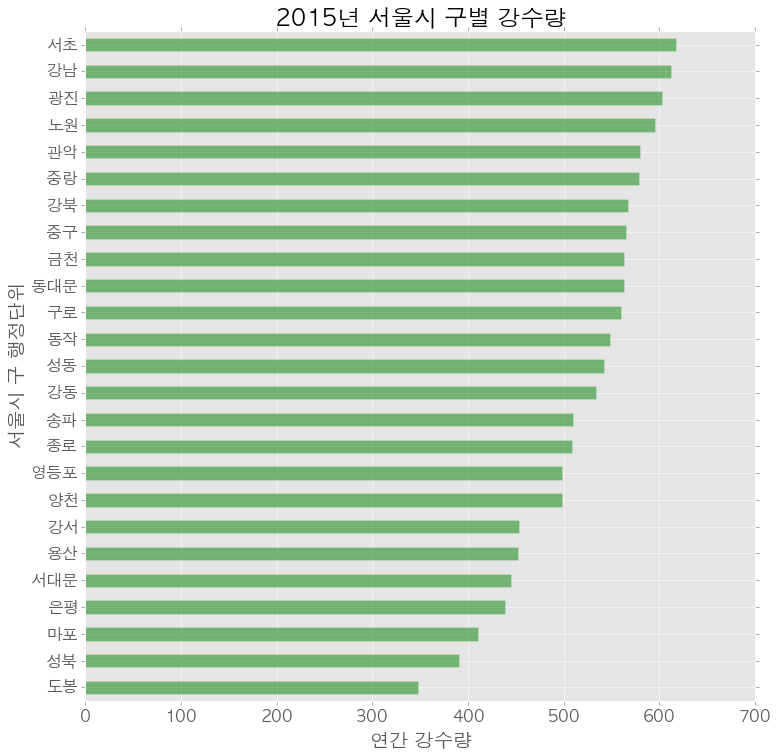

In [59]:
fig = plt.figure(num=None, figsize=(12, 12), dpi=100, facecolor='w', edgecolor='g')

plt.rcParams.update({'font.size': 16})
rain_data = pd.Series(list(seoul_rainsum_sorted.values()), index=list(seoul_rainsum_sorted.keys())) 
plt.title('2015년 서울시 구별 강수량')
plt.ylabel('서울시 구 행정단위')
plt.xlabel('연간 강수량')


rain_data.plot(kind='barh', color='g', alpha=0.5)
plt.savefig('rain_graph_2015.png', dpi=500, box_inches='tight')